### Part 1 : EDA and data preprocessing

In [507]:
! pip install plotly
import plotly.graph_objects as go
import plotly.io as pio
import seaborn as sns
import plotly.express as px
import pandas as pd
#import math as math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [508]:
# reading of dataset
datawal=pd.read_csv("Walmart_Store_sales.csv") 
datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,6.0,18-02-2011,1572117.54,NaN,59.61,3.045,214.777523,6.858
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
2,17.0,27-07-2012,NaN,0.0,NaN,NaN,130.719581,5.936
3,11.0,NaN,1244390.03,0.0,84.57,NaN,214.556497,7.346
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092


In [509]:
# Basic statistics

# -> CPI ("Consumer price index") : This index measures the change in prices for the essential goods 
# and services that the least wealthy in our society must consume, such as rent, food and energy.

print("------------------------")
print("Basics statistics: ")
data_desc = datawal.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

print("details of features : ")
datawal.info()
print("------------------------")


------------------------
Basics statistics: 


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,150.000000,132,1.360000e+02,138.000000,132.000000,136.000000,138.000000,135.000000
unique,NaN,85,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,19-10-2012,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
mean,9.866667,NaN,1.249536e+06,0.079710,61.398106,3.320853,179.898509,7.598430
std,6.231191,NaN,6.474630e+05,0.271831,18.378901,0.478149,40.274956,1.577173
min,1.000000,NaN,2.689290e+05,0.000000,18.790000,2.514000,126.111903,5.143000
25%,4.000000,NaN,6.050757e+05,0.000000,45.587500,2.852250,131.970831,6.597500
50%,9.000000,NaN,1.261424e+06,0.000000,62.985000,3.451000,197.908893,7.470000
75%,15.750000,NaN,1.806386e+06,0.000000,76.345000,3.706250,214.934616,8.150000



Percentage of missing values: 


Store            0.000000
Date            12.000000
Weekly_Sales     9.333333
Holiday_Flag     8.000000
Temperature     12.000000
Fuel_Price       9.333333
CPI              8.000000
Unemployment    10.000000
dtype: float64


details of features : 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         150 non-null    float64
 1   Date          132 non-null    object 
 2   Weekly_Sales  136 non-null    float64
 3   Holiday_Flag  138 non-null    float64
 4   Temperature   132 non-null    float64
 5   Fuel_Price    136 non-null    float64
 6   CPI           138 non-null    float64
 7   Unemployment  135 non-null    float64
dtypes: float64(7), object(1)
memory usage: 9.5+ KB
------------------------


In [513]:
# Drop rows with Nan in Date column and HolidayFlag

datawal = datawal[datawal['Date'].notna() & datawal['Holiday_Flag'].notna()] 
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [514]:
# Drop rows without "y" column (Weekly_sales)

datawal = datawal[datawal['Weekly_Sales'].notna()] 
datawal


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,13.0,25-03-2011,1807545.43,0.0,42.38,3.435,128.616064,7.470
4,6.0,28-05-2010,1644470.66,0.0,78.89,2.759,212.412888,7.092
5,4.0,28-05-2010,1857533.70,0.0,NaN,2.756,126.160226,7.896
6,15.0,03-06-2011,695396.19,0.0,69.80,4.069,134.855161,7.658
7,20.0,03-02-2012,2203523.20,0.0,39.93,3.617,213.023622,6.961
...,...,...,...,...,...,...,...,...
144,3.0,19-10-2012,424513.08,0.0,73.44,3.594,226.968844,6.034
145,14.0,18-06-2010,2248645.59,0.0,72.62,2.780,182.442420,8.899
147,17.0,11-06-2010,845252.21,0.0,57.14,2.841,126.111903,NaN
148,8.0,12-08-2011,856796.10,0.0,86.05,3.638,219.007525,NaN


In [515]:
#Convert date in datetime object
datawal['Date'] = pd.to_datetime(datawal['Date'])  
datawal.info()
# confirmation of Dtype for "Date" feature

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109 entries, 1 to 149
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         109 non-null    float64       
 1   Date          109 non-null    datetime64[ns]
 2   Weekly_Sales  109 non-null    float64       
 3   Holiday_Flag  109 non-null    float64       
 4   Temperature   98 non-null     float64       
 5   Fuel_Price    98 non-null     float64       
 6   CPI           100 non-null    float64       
 7   Unemployment  98 non-null     float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 7.7 KB


/tmp/ipykernel_74/726178716.py:2: UserWarning: Parsing '25-03-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_74/726178716.py:2: UserWarning: Parsing '28-05-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_74/726178716.py:2: UserWarning: Parsing '19-08-2011' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_74/726178716.py:2: UserWarning: Parsing '15-10-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  datawal['Date'] = pd.to_datetime(datawal['Date'])
/tmp/ipykernel_74/726178716.py:2: UserWarning: Parsing '13-05-2011' in DD/MM/YYYY format. Provide format or specify infer_da

In [516]:
#create 4 columns for splitting date
datawal['year'] = datawal['Date'].dt.year    
datawal['month'] = datawal['Date'].dt.month
datawal['day'] = datawal['Date'].dt.day
datawal['weekday'] = datawal['Date'].dt.weekday
datawal

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
144,3.0,2012-10-19,424513.08,0.0,73.44,3.594,226.968844,6.034,2012,10,19,4
145,14.0,2010-06-18,2248645.59,0.0,72.62,2.780,182.442420,8.899,2010,6,18,4
147,17.0,2010-11-06,845252.21,0.0,57.14,2.841,126.111903,NaN,2010,11,6,5
148,8.0,2011-12-08,856796.10,0.0,86.05,3.638,219.007525,NaN,2011,12,8,3


In [517]:
#Check of missing values
print("Percentage of missing values: ")
display(100*datawal.isnull().sum()/datawal.shape[0])
print()

Percentage of missing values: 


Store            0.000000
Date             0.000000
Weekly_Sales     0.000000
Holiday_Flag     0.000000
Temperature     10.091743
Fuel_Price      10.091743
CPI              8.256881
Unemployment    10.091743
year             0.000000
month            0.000000
day              0.000000
weekday          0.000000
dtype: float64

/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/seab

<AxesSubplot:xlabel='Unemployment'>

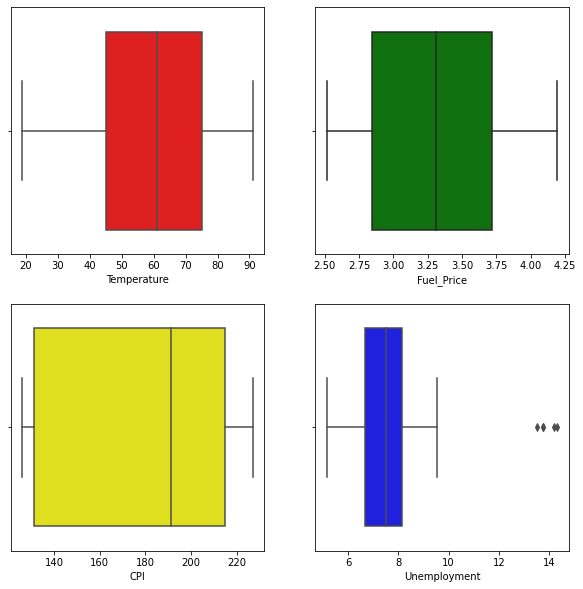

In [518]:
# Detect outliers for Temperature, Fuel_price, CPI and Unemployment features
# There are outliers for the feature "Unemployment". We will check and remove them in the next step

plt.figure(figsize=(10,10))
plt.subplot(221)
sns.boxplot(datawal['Temperature'],color="red") 
plt.subplot(222)
sns.boxplot(datawal['Fuel_Price'],color="green")
plt.subplot(223)
sns.boxplot(datawal['CPI'],color="yellow")
plt.subplot (224)
sns.boxplot(datawal['Unemployment'],color="blue")

In [519]:
#cleaning of outliers

datawal['Unemployment'].mean()

7.719989795918366

In [520]:
datawal["Unemployment"].std()*3

5.171528481416763

In [521]:
upper_bound = datawal["Unemployment"].mean()+datawal["Unemployment"].std()*3
upper_bound

12.891518277335129

In [522]:
lower_bound = datawal["Unemployment"].mean()-datawal["Unemployment"].std()*3
lower_bound

2.548461314501603

In [523]:
mask = (datawal["Unemployment"] < upper_bound) & (datawal["Unemployment"] > lower_bound)
mask

1       True
4       True
5       True
6       True
7       True
       ...  
144     True
145     True
147    False
148    False
149     True
Name: Unemployment, Length: 109, dtype: bool

In [524]:
clean_datawal = datawal.loc[mask, :]  
clean_datawal.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday
1,13.0,2011-03-25,1807545.43,0.0,42.38,3.435,128.616064,7.470,2011,3,25,4
4,6.0,2010-05-28,1644470.66,0.0,78.89,2.759,212.412888,7.092,2010,5,28,4
5,4.0,2010-05-28,1857533.70,0.0,NaN,2.756,126.160226,7.896,2010,5,28,4
6,15.0,2011-03-06,695396.19,0.0,69.80,4.069,134.855161,7.658,2011,3,6,6
7,20.0,2012-03-02,2203523.20,0.0,39.93,3.617,213.023622,6.961,2012,3,2,4


In [525]:
# Replacing missing values by "mean" method 

clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
clean_datawal['CPI'].fillna(value=clean_datawal['CPI'].mean(), inplace=True)
clean_datawal['Unemployment'].fillna(value=clean_datawal['Unemployment'].mean(), inplace=True)

/tmp/ipykernel_74/296008314.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Temperature'].fillna(value=clean_datawal['Temperature'].mean(), inplace=True)
/tmp/ipykernel_74/296008314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['Fuel_Price'].fillna(value=clean_datawal['Fuel_Price'].mean(), inplace=True)
/tmp/ipykernel_74/296008314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_datawal['

In [526]:
#Check if ok about "fillna"

print("Percentage of missing values: ")  
display(100*clean_datawal.isnull().sum()/clean_datawal.shape[0])
print()

Percentage of missing values: 


Store           0.0
Date            0.0
Weekly_Sales    0.0
Holiday_Flag    0.0
Temperature     0.0
Fuel_Price      0.0
CPI             0.0
Unemployment    0.0
year            0.0
month           0.0
day             0.0
weekday         0.0
dtype: float64

In [527]:
clean_datawal.shape

# it remains 93 rows for preprocessing

(93, 12)

In [528]:
# Reorganisation of columns before EDA
# Reminder Y : Weekly_Sales

clean_datawal = clean_datawal[['Store',  
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','year',
 'month',
 'day',
 'weekday','Weekly_Sales']]

clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
1,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
4,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
5,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
6,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
7,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
142,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
143,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
144,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
145,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


In [529]:
#reinitialisate index first column
clean_datawal = clean_datawal.reset_index(drop=True)
clean_datawal

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,weekday,Weekly_Sales
0,13.0,0.0,42.380000,3.435,128.616064,7.470,2011,3,25,4,1807545.43
1,6.0,0.0,78.890000,2.759,212.412888,7.092,2010,5,28,4,1644470.66
2,4.0,0.0,58.965647,2.756,126.160226,7.896,2010,5,28,4,1857533.70
3,15.0,0.0,69.800000,4.069,134.855161,7.658,2011,3,6,6,695396.19
4,20.0,0.0,39.930000,3.617,213.023622,6.961,2012,3,2,4,2203523.20
...,...,...,...,...,...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197,2011,7,10,6,403342.40
89,3.0,0.0,78.530000,2.705,214.495838,7.343,2010,4,6,1,396968.80
90,3.0,0.0,73.440000,3.594,226.968844,6.034,2012,10,19,4,424513.08
91,14.0,0.0,72.620000,2.780,182.442420,8.899,2010,6,18,4,2248645.59


<AxesSubplot:>

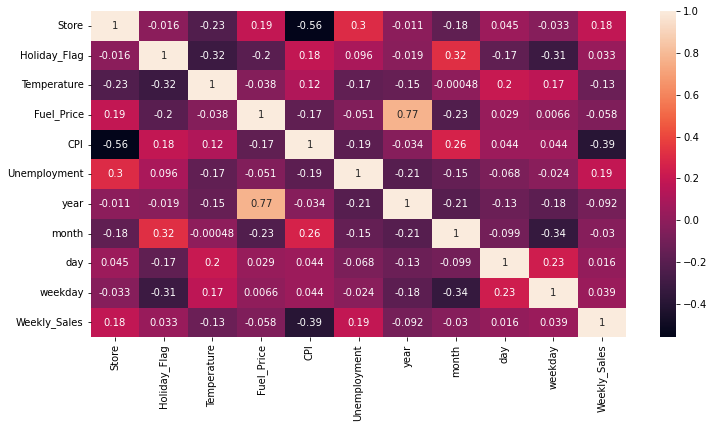

In [530]:
# Heatmap + some visualizations to check coorelations
corr = clean_datawal.corr()
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, annot=True, ax=ax)

#### ---> Negative coorelation for "CPI/Store" and "CPI/Weekly sales"
#### ---> we will check the couple "Unemployment/Weekly Sales"
#### ---> Strong positive coorelation between "Fuel_Price/Year"(0,82)

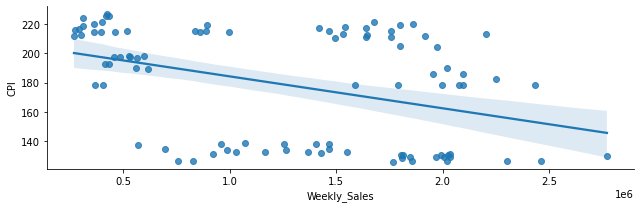

In [531]:
sns.lmplot(x="Weekly_Sales", y="CPI", data=clean_datawal, height=3,aspect=3)

#### --> When CPI decreases, the sales increases

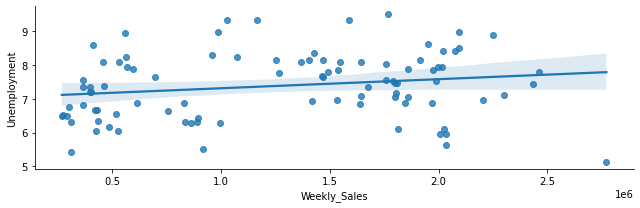

In [532]:
sns.lmplot(x="Weekly_Sales", y="Unemployment", data=clean_datawal, height=3,aspect=3)

#### --> Sales Increases when Unemployment increases too but slightly

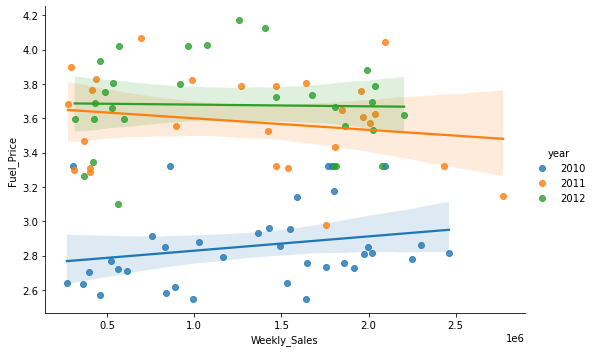

In [533]:
sns.lmplot(x="Weekly_Sales", y="Fuel_Price", data=clean_datawal,hue="year", height=5,aspect=1.5)

#### ---> Fuel price has not impact on sales (rather flat each year)

### Preprocessing

In [639]:
# Remove date columns

# To solve the issue about array size #

predatawal = clean_datawal[['Store',  
 'Holiday_Flag',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment','Weekly_Sales']]

predatawal



,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Weekly_Sales
0,13.0,0.0,42.380000,3.435,128.616064,7.470,1807545.43
1,6.0,0.0,78.890000,2.759,212.412888,7.092,1644470.66
2,4.0,0.0,58.965647,2.756,126.160226,7.896,1857533.70
3,15.0,0.0,69.800000,4.069,134.855161,7.658,695396.19
4,20.0,0.0,39.930000,3.617,213.023622,6.961,2203523.20
...,...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197,403342.40
89,3.0,0.0,78.530000,2.705,214.495838,7.343,396968.80
90,3.0,0.0,73.440000,3.594,226.968844,6.034,424513.08
91,14.0,0.0,72.620000,2.780,182.442420,8.899,2248645.59


In [662]:
# separate X from Y features + remove date columns

X = predatawal.iloc[:, :-1]
Y = predatawal.iloc[:, -1:]
X

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,13.0,0.0,42.380000,3.435,128.616064,7.470
1,6.0,0.0,78.890000,2.759,212.412888,7.092
2,4.0,0.0,58.965647,2.756,126.160226,7.896
3,15.0,0.0,69.800000,4.069,134.855161,7.658
4,20.0,0.0,39.930000,3.617,213.023622,6.961
...,...,...,...,...,...,...
88,3.0,0.0,75.540000,3.285,178.360183,7.197
89,3.0,0.0,78.530000,2.705,214.495838,7.343
90,3.0,0.0,73.440000,3.594,226.968844,6.034
91,14.0,0.0,72.620000,2.780,182.442420,8.899


In [663]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)  #Split between train set and test set # error about not found in dataset value 9 for Store feature, changed random to 5
print("...split done !")


...split done !


In [664]:
# Preprocessings on train set
numeric_features = [2,3,4,5] # Positions of numeric columns in X_train/X_test
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [665]:
# Preprocessings on test set
categorical_features = [0,1] # Positions of categorical columns in X_train/X_test
categorical_transformer = Pipeline(
    steps=[
     # missing values will be replaced by most frequent value
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

In [666]:
# Make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [667]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[:5])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[:5])
print()

Performing preprocessings on train set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
21    6.0           0.0    58.965647     3.52300  217.270654         6.925
3    15.0           0.0    69.800000     4.06900  134.855161         7.658
67   19.0           0.0    72.830000     2.93200  132.598387         8.099
11    2.0           0.0    50.130000     3.32241  178.360183         7.441
84    4.0           0.0    82.840000     3.62700  129.150774         5.644
...Done.
  (0, 0)	-0.05228041749921817
  (0, 1)	0.46300922013763207
  (0, 2)	0.9884232761528657
  (0, 3)	-0.498122233768766
  (0, 8)	1.0
  (1, 0)	0.5753395155904542
  (1, 1)	1.6570196490884015
  (1, 2)	-1.1948472495264075
  (1, 3)	0.294344292234616
  (1, 16)	1.0
  (2, 0)	0.7508634631290518
  (2, 1)	-0.8294086617486413
  (2, 2)	-1.254631501426393
  (2, 3)	0.7711215609487951
  (2, 20)	1.0
  (3, 0)	-0.5641179260214979
  (3, 1)	0.024351741175598112
  (3, 2)	-0.04235483380310605
  (3, 3)	0.05973960445462528


In [668]:
# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[:5])
X_test = preprocessor.transform(X_test) # Don't fit again !! The test set is used for validating decisions
# we made based on the training set, therefore we can only apply transformations that were parametered using the training set.
# Otherwise this creates what is called a leak from the test set which will introduce a bias in all your results.
print('...Done.')
print(X_test[0:5,:])
print()

Performing preprocessings on test set...
    Store  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
39   13.0           0.0    63.600000       3.648  129.518333         6.877
53    1.0           0.0    62.250000       3.308  218.220509         7.866
43   14.0           0.0    58.965647       4.046  185.937438         8.521
46    4.0           0.0    36.440000       3.149  129.898065         5.143
51   20.0           0.0    75.170000       2.808  204.567546         7.856
...Done.
  (0, 0)	0.2161816031352381
  (0, 1)	0.7363632560695849
  (0, 2)	-1.3362252701980781
  (0, 3)	-0.550016358254661
  (0, 14)	1.0
  (1, 0)	0.13797786413289254
  (1, 1)	-0.0071597216653264475
  (1, 2)	1.0135858913122977
  (1, 3)	0.5192188316735036
  (2, 0)	-0.05228041749921817
  (2, 1)	1.606722506476923
  (2, 2)	0.1583743913008697
  (2, 3)	1.2273574053873058
  (2, 15)	1.0
  (3, 0)	-1.3571617682008386
  (3, 1)	-0.354866055370771
  (3, 2)	-1.3261658031432508
  (3, 3)	-2.4246916053076872
  (3, 6)	1.0
 

### Part 2 : Baseline model (linear regression)

In [669]:
# To call regression model and train the model

regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

...Done.


In [670]:
# Predictions on training set

print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()


Predictions on training set...
...Done.
[[1540565.47833973]
 [ 621323.74662536]
 [1425509.94889979]
 [1948912.88576737]
 [2027897.65892115]]



In [671]:
# Predictions on test set

print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Predictions on test set...
...Done.
[[2016673.92645017]
 [1573308.85248308]
 [2014363.41851396]
 [2152527.5260548 ]
 [1788617.50623368]]



In [672]:
# Print R^2 scores

print("R2 score on training set is : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set is : ", r2_score(Y_test, Y_test_pred))

R2 score on training set is :  0.9683946014525397
R2 score on test set is :  0.9132448848022621


In [673]:
#Analyze the values of the model's coefficients to know what features are important for the prediction
regressor.coef_

array([[  -23016.26249398,   -42190.76920022,    -3491.08908063,
          -34582.62913374,   341197.52229324, -1194418.69392766,
          420159.70521696, -1310911.15886775,   -52555.79308608,
        -1046832.99107088,  -750077.25297371, -1168504.109594  ,
          275762.11965694,   133918.25603926,   431354.47398312,
          526270.13822379,  -887192.25716605, -1120057.02263654,
         -828048.99272668,  -409648.20222031,  -167590.97332218,
          184766.30557994,    -4235.59675913]])

In [674]:
coeff = pd.DataFrame(data = regressor.coef_.transpose(), columns=["coefficients"])
coeff = np.round(coeff)
coeff.sort_values("coefficients", ascending=False)

,coefficients
15,526270.0
14,431354.0
6,420160.0
4,341198.0
12,275762.0
21,184766.0
13,133918.0
2,-3491.0
22,-4236.0
0,-23016.0


In [ ]:
# The moste relevant fetures are : 

### Part 3 : Fight overfitting

In [675]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV

In [676]:
# Perform 6-fold cross-validation to evaluate the generalized R2 score obtained with a Ridge model`

print("6-fold cross-validation...")
regressor = Ridge()
scores = cross_val_score(regressor, X_train, Y_train, cv=6)
print('The cross-validated R2-score is : ', scores.mean())
print('The standard deviation is : ', scores.std())

6-fold cross-validation...
The cross-validated R2-score is :  0.7975584242178891
The standard deviation is :  0.0918618076036657


In [677]:
# Perform grid search
print("Grid search...")
regressor = Ridge()
# Grid of values to be tested
params = {
    'alpha': [0.0, 0.1, 0.5, 1.0] # 0 corresponds to no regularization
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 6) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best R2 score : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'alpha': 0.1}
Best R2 score :  0.8860529166036891


In [678]:
# Predictions on training set
# The model has already be re-trained on all the training set at the end of the grid search, so we can directly use it !
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[[1537455.7311307 ]
 [ 658954.17591945]
 [1431598.98679485]
 [1932785.3432311 ]
 [1993500.14528167]
 [1466342.59959787]
 [ 399635.93094545]
 [ 617066.43367883]
 [1182410.39405596]
 [2085829.03986018]
 [ 925320.02018722]
 [1936022.54942261]
 [ 416455.69503742]
 [ 854478.30503406]
 [ 503834.21556339]
 [ 488724.62036773]
 [ 609441.08422204]
 [ 490456.67058423]
 [1568553.73294957]
 [1405791.29766496]
 [2000968.02358308]
 [1964562.30942657]
 [2037052.39957695]
 [1731179.66599595]
 [1099017.20420516]
 [1578327.9300945 ]
 [2058289.03246481]
 [2037463.60536917]
 [1109381.27651716]
 [2019742.11484273]
 [ 286175.64657375]
 [1999160.99642368]
 [ 480827.32270392]
 [2078811.51212267]
 [ 330318.47416681]
 [1434175.13563088]
 [ 521957.76477104]
 [1733673.53334647]
 [ 588144.28014276]
 [ 678434.27601655]
 [ 519685.42809157]
 [1098084.33978534]
 [2079485.13856019]
 [1783750.17826867]
 [1995225.29232706]
 [ 380514.15491565]
 [ 278825.87204373]
 [ 836811.52717554]


In [679]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()

Predictions on test set...
...Done.
[[2006308.29737019]
 [1443294.23503356]
 [1997514.73797955]
 [2056837.002872  ]
 [1766097.04979945]
 [ 424359.79491271]
 [2065902.41247779]
 [2047590.69698921]
 [ 520932.43368303]
 [ 332041.406342  ]
 [ 927662.11195555]
 [1730171.91356595]
 [1173435.73830461]
 [ 577353.44287818]
 [1356431.43789265]
 [1385563.63469405]
 [1760029.28067831]
 [1410992.75339098]
 [ 897378.38450371]]



In [680]:
# Print R^2 scores on train/test sets for the Ridge model with optimal value of the regularization strength
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.965461527591962
R2 score on test set :  0.8922964790030953


In [48]:
#Conclusions : The R2 gap between train and test set with Ridge model, as well as score are on test set are better.
#Conclusions 2 : to be filled in